In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tp = sns.load_dataset('tips')
tp.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tp.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
day_encoder = LabelEncoder()
time_encoder = LabelEncoder()

In [7]:
# Check the number of male and female in the dataset

tp['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [9]:
tp['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [10]:
tp['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [11]:
tp['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [13]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
x = tp[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tp['tip']


In [15]:
import warnings 
warnings.filterwarnings('ignore')

sex_encoder.fit(pd.DataFrame(x['sex']))
x['sex'] = sex_encoder.transform(x['sex'])

smoker_encoder.fit(pd.DataFrame(x['smoker']))
x['smoker'] = smoker_encoder.transform(x['smoker'])


day_encoder.fit(pd.DataFrame(x['day']))
x['day'] = day_encoder.transform(x['day'])


time_encoder.fit(pd.DataFrame(x['time']))
x['time'] = time_encoder.transform(x['time'])

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    int32  
 2   smoker      244 non-null    int32  
 3   day         244 non-null    int32  
 4   time        244 non-null    int32  
 5   size        244 non-null    int64  
dtypes: float64(1), int32(4), int64(1)
memory usage: 7.8 KB


In [18]:
# 1 is for Male and 0 for female 
x['sex'].value_counts()

sex
1    157
0     87
Name: count, dtype: int64

In [19]:
# So here No is for 0 and Yes if for 1
x['smoker'].value_counts()

smoker
0    151
1     93
Name: count, dtype: int64

In [20]:
# Here 0 represents Friday, 1 represents Saturday, 2 represents Sunday, 3 represents Thursday
x['day'].value_counts()

day
1    87
2    76
3    62
0    19
Name: count, dtype: int64

In [22]:
# here 0 represents dinner and 1 represents lunch
x['time'].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [23]:
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [24]:
cormat = x.corr()
cormat

,total_bill,sex,smoker,day,time,size
total_bill,1.000000,0.144877,0.085721,-0.043550,-0.183118,0.598315
sex,0.144877,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.086195,-0.133178,0.069510,-0.103411,1.000000


<Axes: >

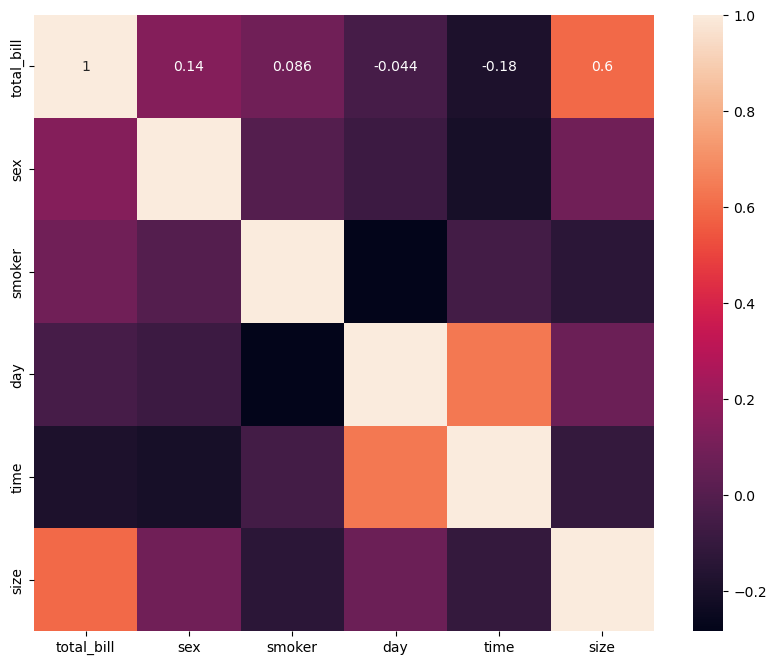

In [29]:
plt.figure(figsize = (10, 8))
sns.heatmap(x.corr(), annot = True)

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [35]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [41]:
# Training of the datset of X_train and Y_train
model.fit(X_train, Y_train)

LinearRegression()

In [43]:
# testing od the dataset
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
score = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)

In [49]:
print("The r2 score value is ",score)
print("The MSE value is ",mse)
print("The MAE value is ", mae)
print("The RMSE value is " ,rmse)

The r2 score value is  0.4441368826121932
The MSE value is  0.694812968628771
The MAE value is  0.6703807496461157
The RMSE value is  0.8335544185167343


In [50]:
import joblib

joblib.dump(model, 'tip.pkl')

['tip.pkl']